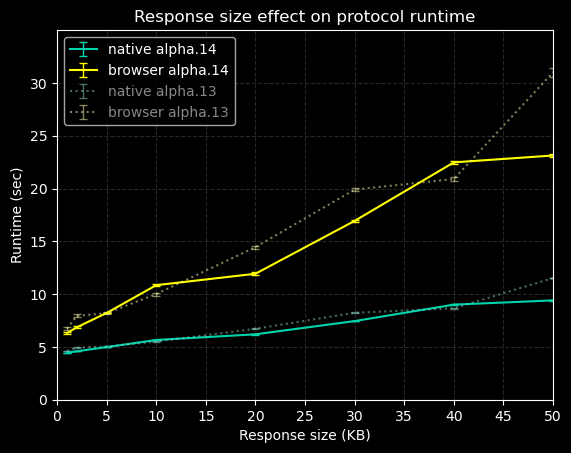

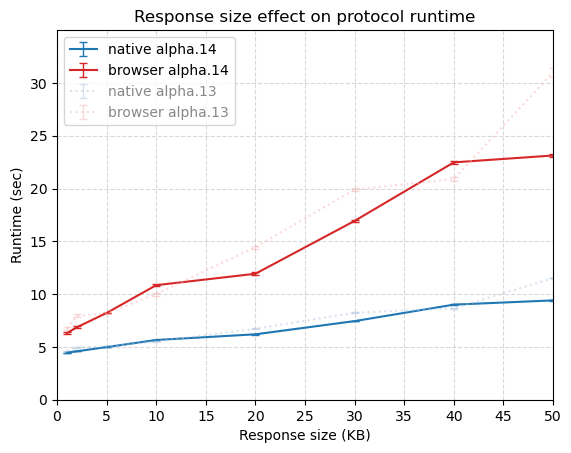

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd

for dark in [True, False]:
    # Define colors - using original benchmarks colors for faded, more saturated for solid
    if dark:
        plt.style.use("dark_background")
        color_native_faded = '#8dd3c7'
        color_browser_faded = '#feffb3'
        color_native = '#00d4aa'  # cyan
        color_browser = '#ffff00'  # yellow
    else:
        plt.style.use("default")
        color_native_faded = '#b3c6e0'   # light blue
        color_browser_faded = '#f7b6b6'  # light red
        color_native = '#1f77b4'         # blue
        color_browser = '#d62728'        # red

    # Old benchmarks (alpha.13) from old_commit/
    df1_old = pd.read_csv("native_download_alpha13.csv", header=0)
    df2_old = pd.read_csv("browser_download_alpha13.csv", header=0)

    # New benchmarks (alpha.14) from harness/
    df1_new = pd.read_csv("native_download_alpha14.csv", header=0)
    df2_new = pd.read_csv("browser_download_alpha14.csv", header=0)

    # Filter for download_sweep group
    df1_old = df1_old[df1_old['group'] == 'download_sweep']
    df2_old = df2_old[df2_old['group'] == 'download_sweep']
    df1_new = df1_new[df1_new['group'] == 'download_sweep']
    df2_new = df2_new[df2_new['group'] == 'download_sweep']

    # Calculate mean and standard deviation for error bars
    agg1_old = df1_old.groupby("download_size")["time_total"].agg(['mean', 'std']).reset_index()
    agg2_old = df2_old.groupby("download_size")["time_total"].agg(['mean', 'std']).reset_index()
    agg1_new = df1_new.groupby("download_size")["time_total"].agg(['mean', 'std']).reset_index()
    agg2_new = df2_new.groupby("download_size")["time_total"].agg(['mean', 'std']).reset_index()

    # Fill NaN std values with 0 (for single data points)
    agg1_old['std'] = agg1_old['std'].fillna(0)
    agg2_old['std'] = agg2_old['std'].fillna(0)
    agg1_new['std'] = agg1_new['std'].fillna(0)
    agg2_new['std'] = agg2_new['std'].fillna(0)

    # Plot with error bars - alpha.14 first (for legend order), then alpha.13
    plt.errorbar(agg1_new["download_size"]/1024.0, agg1_new["mean"]/1000.0, 
                 yerr=agg1_new["std"]/1000.0, label="native alpha.14", color=color_native, 
                 capsize=3, capthick=1, elinewidth=1)
    plt.errorbar(agg2_new["download_size"]/1024.0, agg2_new["mean"]/1000.0, 
                 yerr=agg2_new["std"]/1000.0, label="browser alpha.14", color=color_browser, 
                 capsize=3, capthick=1, elinewidth=1)
    plt.errorbar(agg1_old["download_size"]/1024.0, agg1_old["mean"]/1000.0, 
                 yerr=agg1_old["std"]/1000.0, label="native alpha.13", linestyle=':', 
                 color=color_native_faded, alpha=0.5, capsize=3, capthick=1, elinewidth=1)
    plt.errorbar(agg2_old["download_size"]/1024.0, agg2_old["mean"]/1000.0, 
                 yerr=agg2_old["std"]/1000.0, label="browser alpha.13", linestyle=':', 
                 color=color_browser_faded, alpha=0.5, capsize=3, capthick=1, elinewidth=1)

    plt.xlabel("Response size (KB)")
    plt.ylabel("Runtime (sec)")
    plt.title("Response size effect on protocol runtime")

    plt.xticks(list(range(0, 55, 5)))
    plt.yticks(list(range(0, 35, 5)))

    plt.xlim(0, 50)
    plt.ylim(0, 35)

    # Create legend and grey out alpha.13 entries
    legend = plt.legend(loc="upper left")
    for i, text in enumerate(legend.get_texts()):
        if "alpha.13" in text.get_text():
            text.set_color('#888888')  # grey color for alpha.13

    plt.grid(True, linestyle="--", color='gray', alpha=0.3)

    svg_name = "download_dark.svg" if dark else "download_light.svg"
    plt.savefig(svg_name, bbox_inches="tight")
    plt.show()